In [1]:
import scvelo as scv
import numpy as np
import pandas as pd
import scanpy as sc
import loompy
import matplotlib as mpl
import matplotlib.pyplot as pl

import collections.abc
#cellrank needs the following alias to be done manually.
collections.Iterable = collections.abc.Iterable
import cellrank as cr
from scipy.stats import mode
from collections import Counter
from matplotlib import rcParams
#import diffxpy as de
#import palantir
import seaborn
import warnings
import scanpy.external as sce


In [2]:
#settings
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(color_map='viridis')
sc.settings.set_figure_params(dpi=80, facecolor='white')
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==2.0.1 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.10


In [3]:
#results file
results_file = 'C:/Users/rvi33352/Documents/Sox2TdT_C18A2CE/ScVelo/scanpy/FAP1.h5ad'  # the file that will store the analysis results

In [4]:
#read h5 OR h5ac
#adata = sc.read_10x_h5(filename = 'C:/Users/rvi33352/Documents/FAP.h5ad')
adata = sc.read_h5ad(filename = 'C:/Users/rvi33352/Documents/FAP.h5ad')
adata

AnnData object with n_obs × n_vars = 1361 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent_Rp.sl.', 'percent_Hblist', 'pANN_0.25_0.03_20', 'DF.classifications_0.25_0.03_20', 'group', 'pANN_0.25_0.01_26', 'DF.classifications_0.25_0.01_26', 'integrated_snn_res.1.2', 'seurat_clusters', 'RNA_snn_res.0.8', 'celltype', 'celltype_2'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'integrated_features'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'integrated'
    obsp: 'distances'

In [5]:
adata.var_names_make_unique()

normalizing counts per cell
    finished (0:00:00)


C:\Users\rvi33352\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


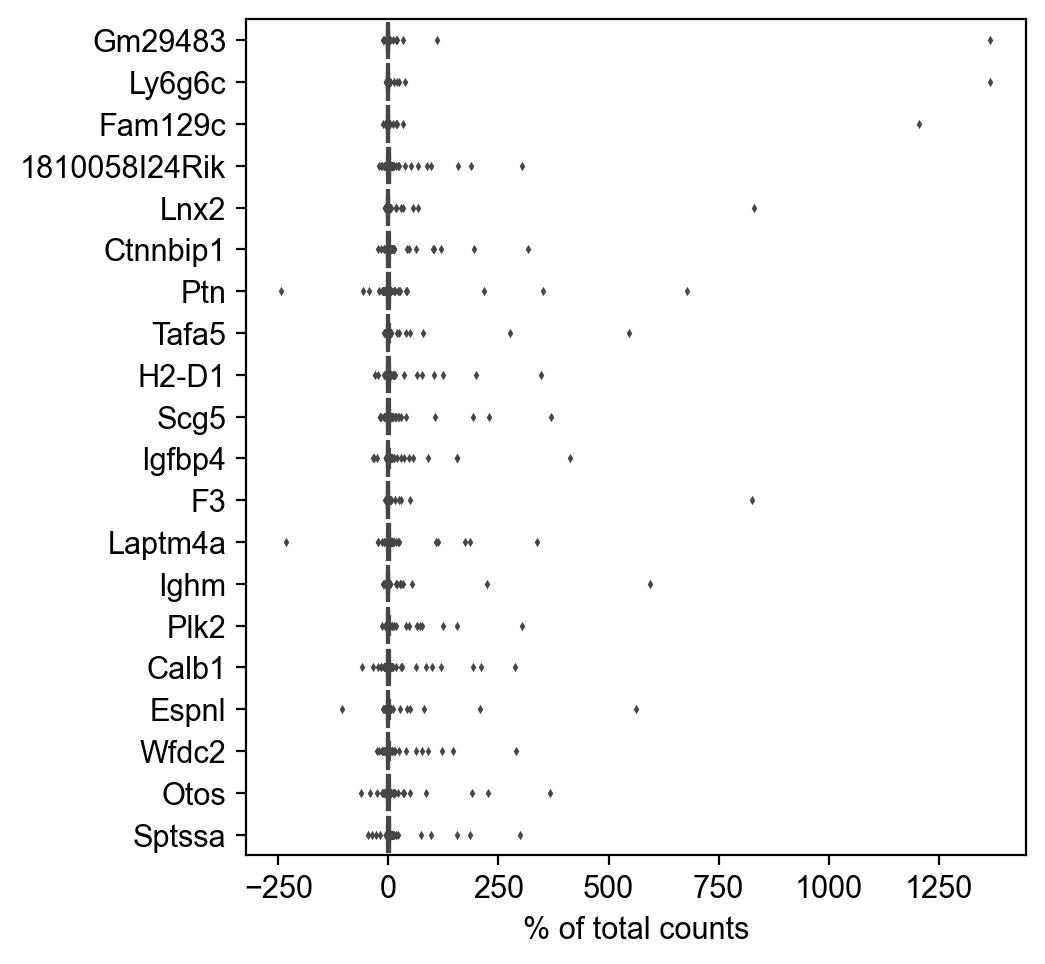

In [6]:
#highest expressed genes
sc.pl.highest_expr_genes(adata, n_top=20, )

In [7]:
adata

AnnData object with n_obs × n_vars = 1361 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent_Rp.sl.', 'percent_Hblist', 'pANN_0.25_0.03_20', 'DF.classifications_0.25_0.03_20', 'group', 'pANN_0.25_0.01_26', 'DF.classifications_0.25_0.01_26', 'integrated_snn_res.1.2', 'seurat_clusters', 'RNA_snn_res.0.8', 'celltype', 'celltype_2'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'integrated_features'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'integrated'
    obsp: 'distances'

In [8]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [9]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:00)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


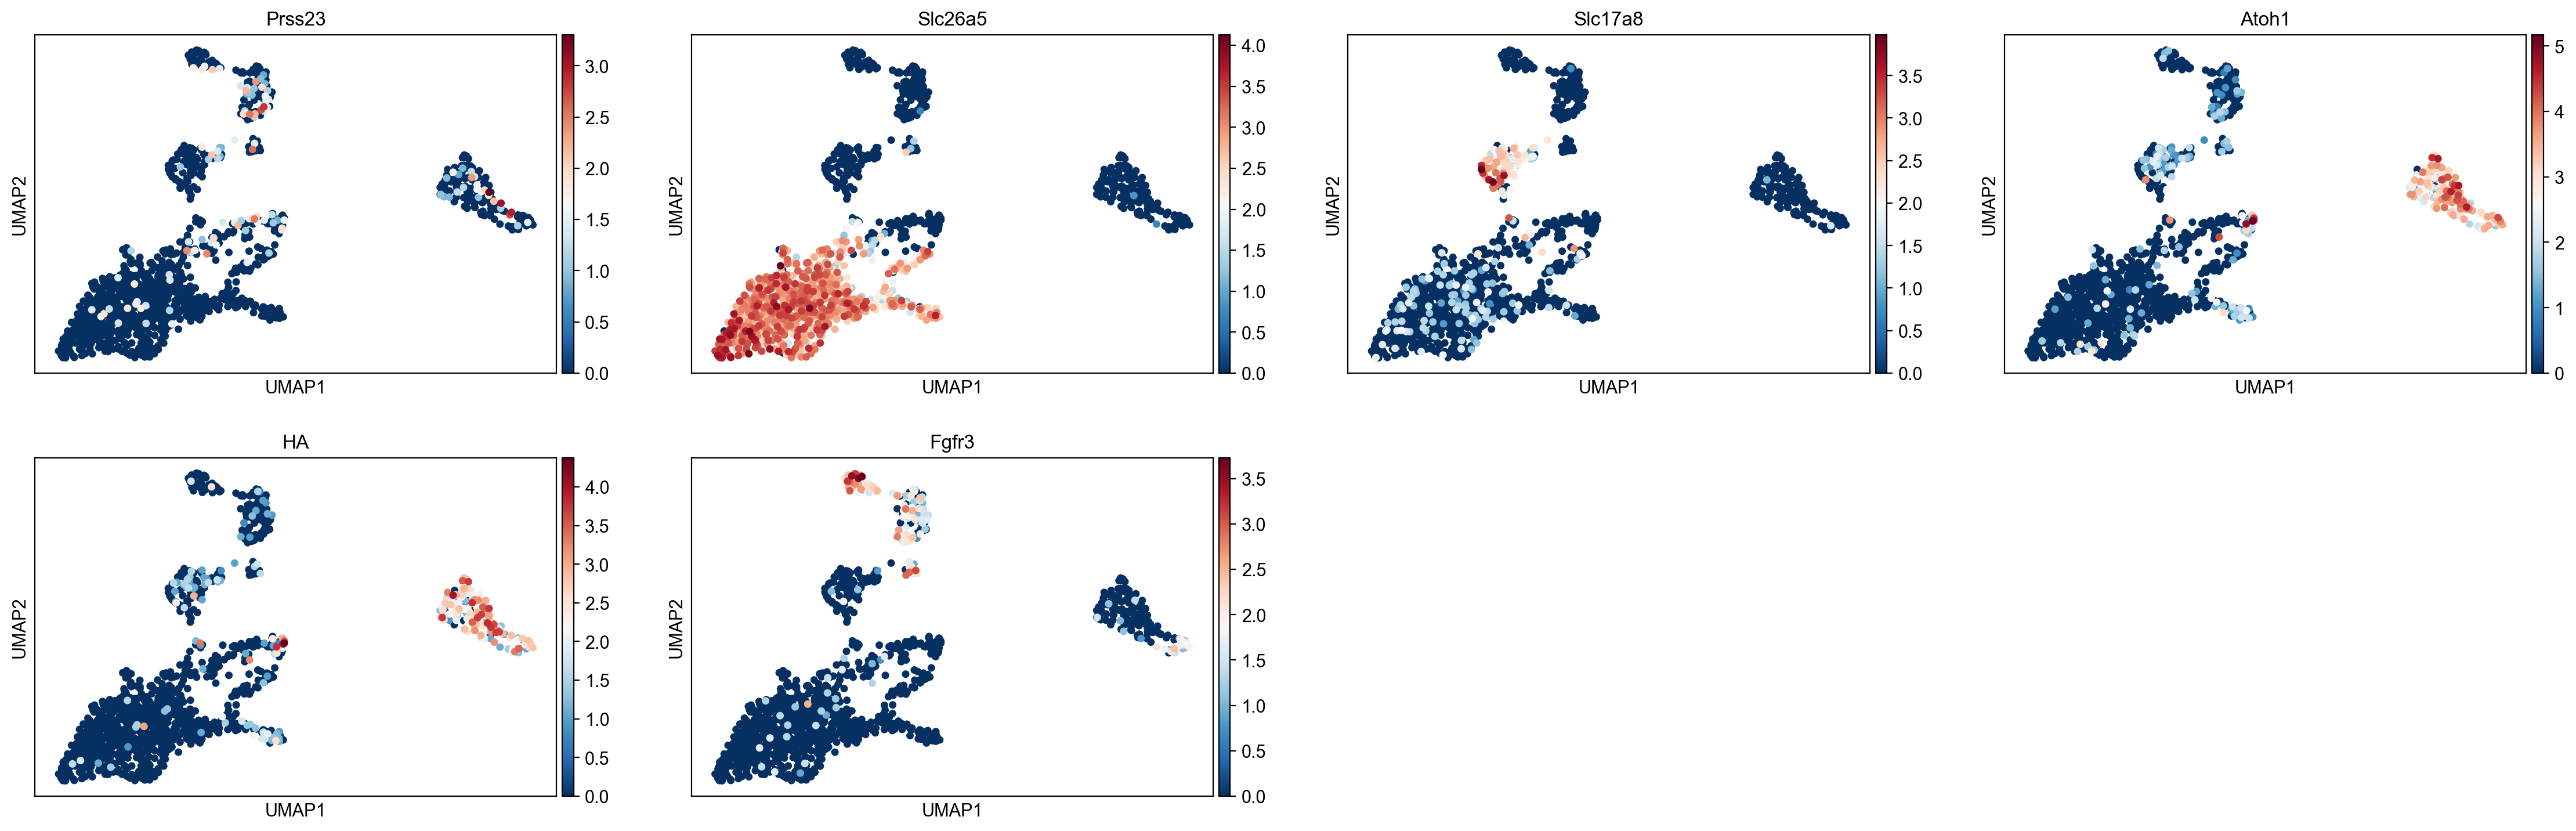

In [10]:
sc.tl.umap(adata) 
sc.pl.umap(adata, color=['Prss23', 'Slc26a5', 'Slc17a8', 'Atoh1', 'HA', 'Fgfr3']) 

In [11]:
sc.tl.leiden(adata, resolution=0.2)

running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


C:\Users\rvi33352\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


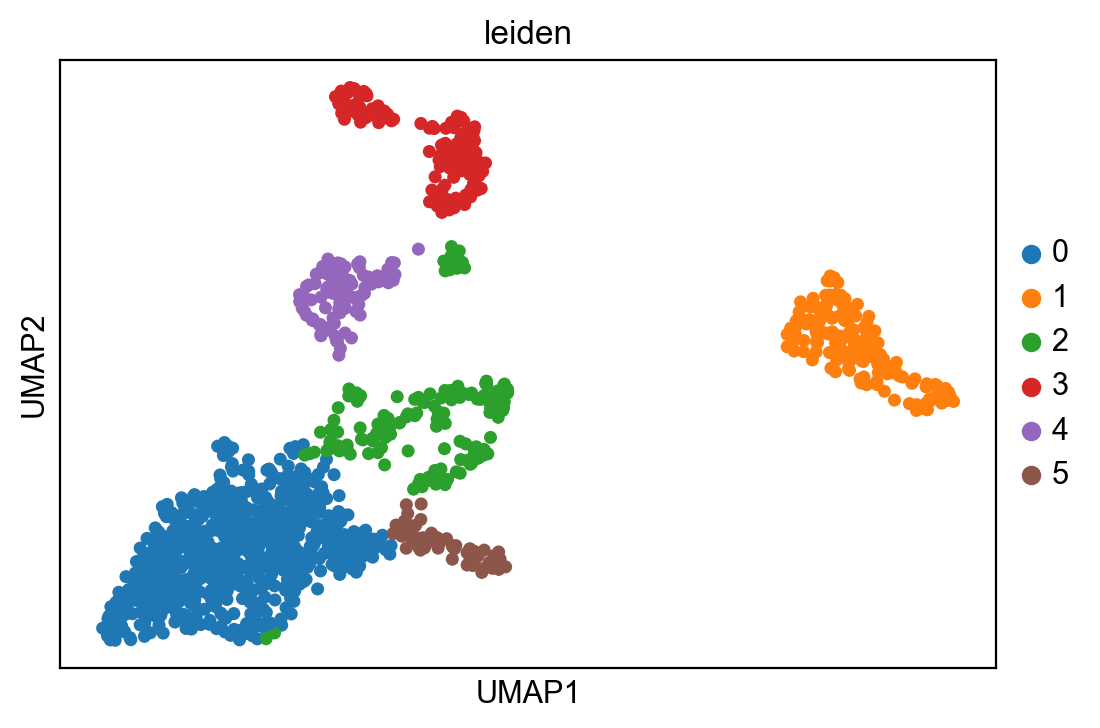

In [12]:
sc.pl.umap(adata, color = ['leiden'])

In [13]:
marker_genes = ["Fgfr3", "HA", "Atoh1", "Sox2", "Lfng", "Gjb2", "Prss23", "S100a6", 
                "S100a1", "Slc1a3", "Fst", "Fabp7", "Slc26a5", "Slc17a8", "Otof", "Ocm", 
                "Pvalb", "Calb2","Tbx2", "Pcp4"]

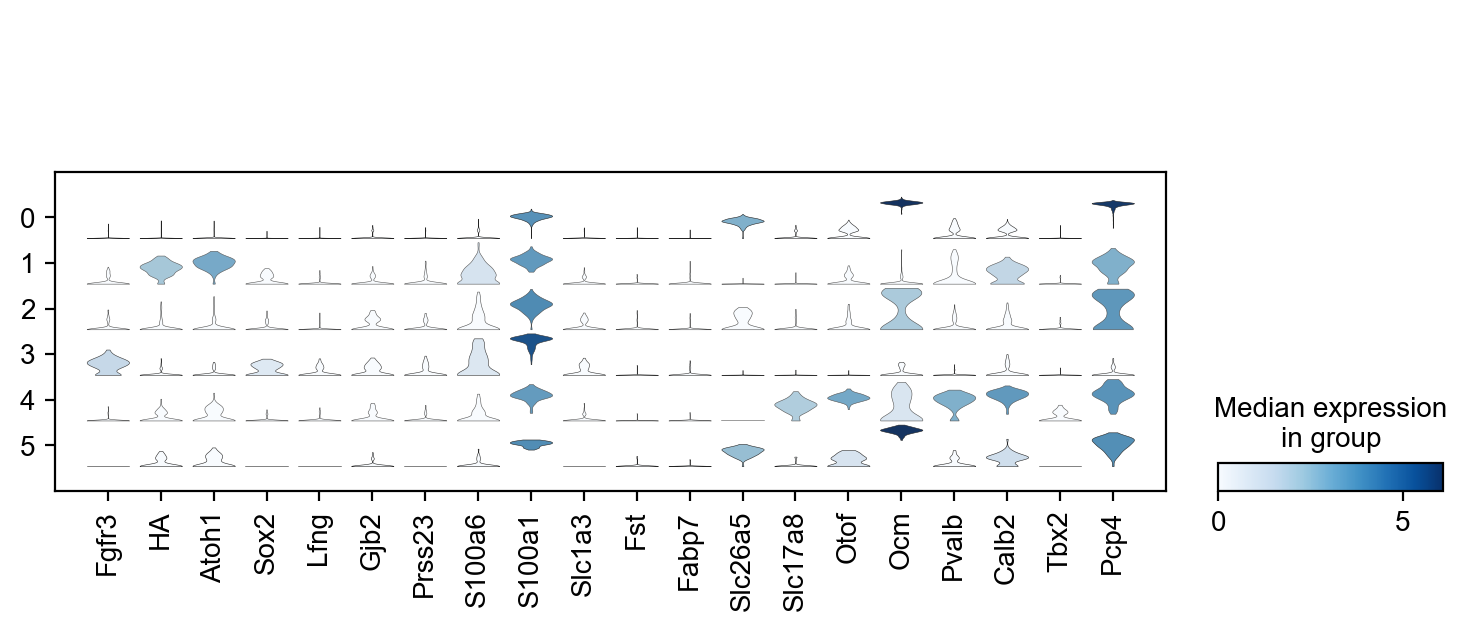

In [14]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

In [15]:
#rename clusters
new_cluster_names = ['OHC', 'cHC1', 'cHC2', 'SC', 'IHC', 'cHC3']
adata.rename_categories('leiden', new_cluster_names)

C:\Users\rvi33352\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


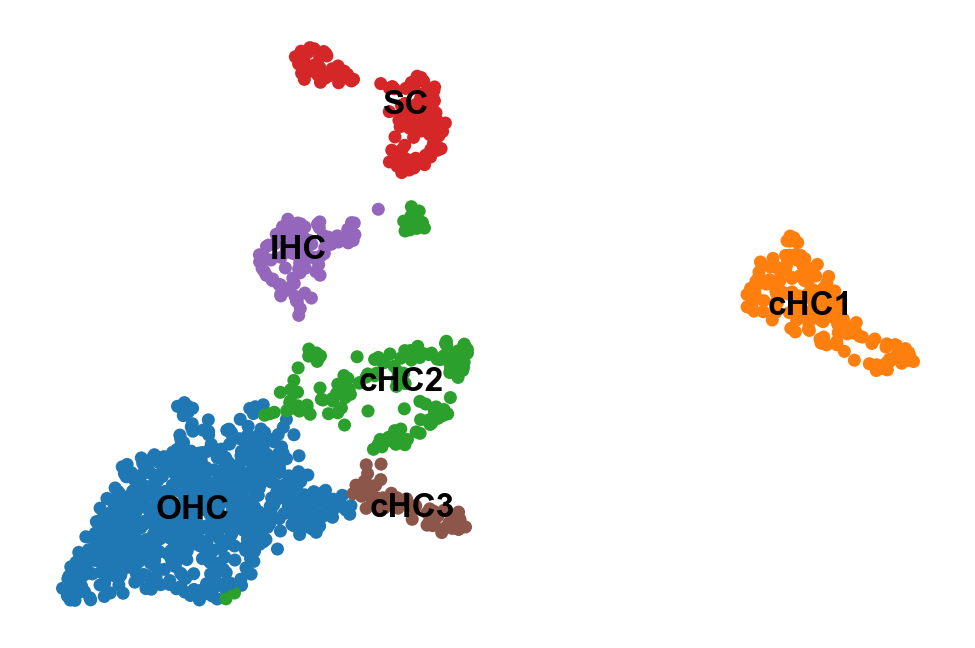

In [16]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


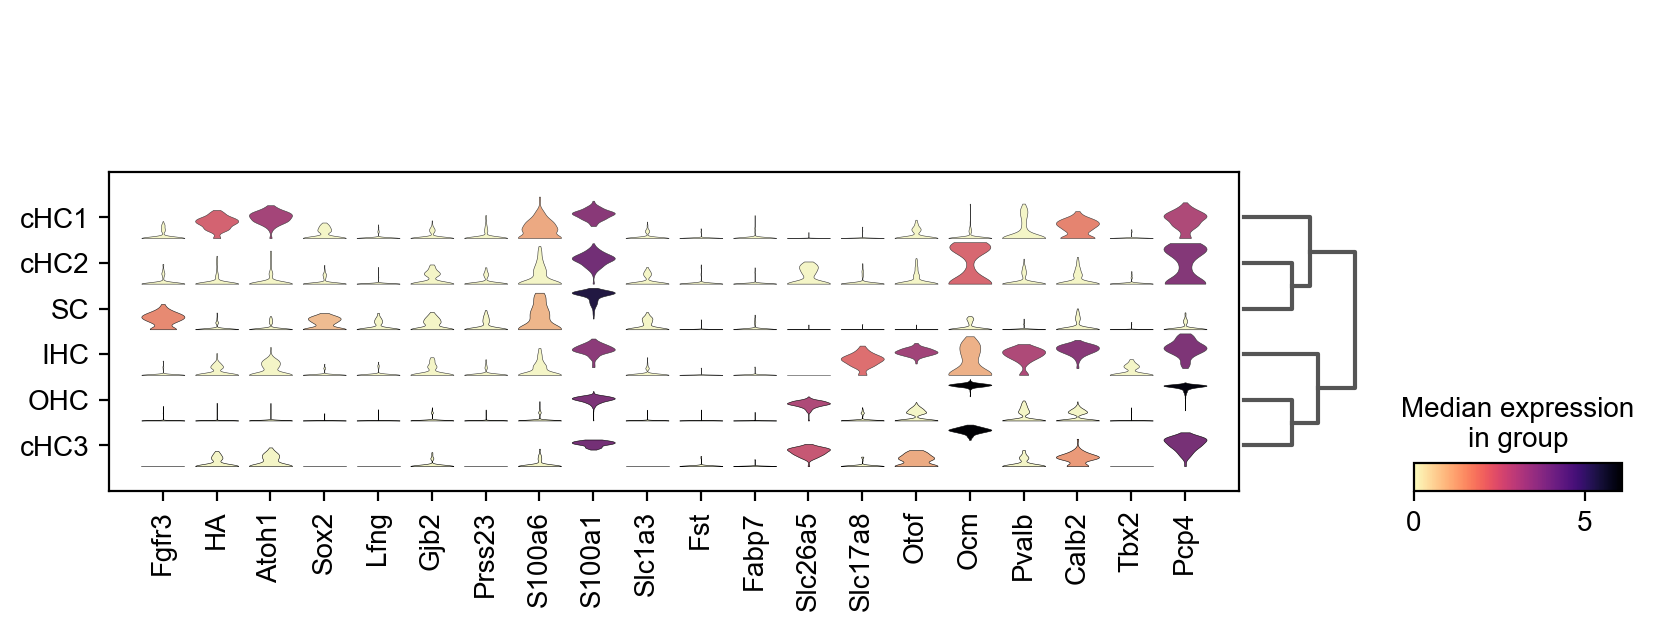

In [17]:
sc.tl.dendrogram(adata, groupby='leiden')
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90, dendrogram=True,
                      cmap='magma_r');

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


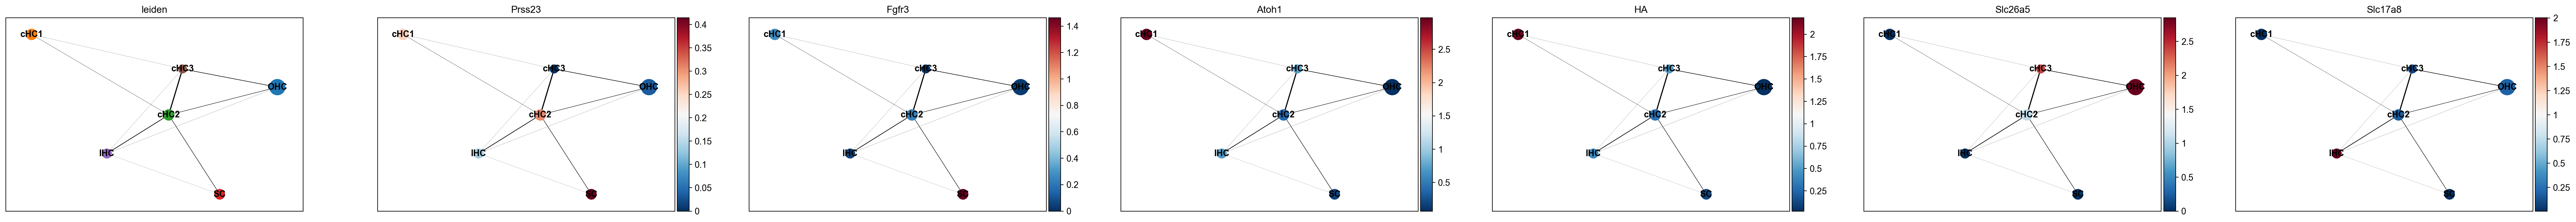

--> added 'pos', the PAGA positions (adata.uns['paga'])


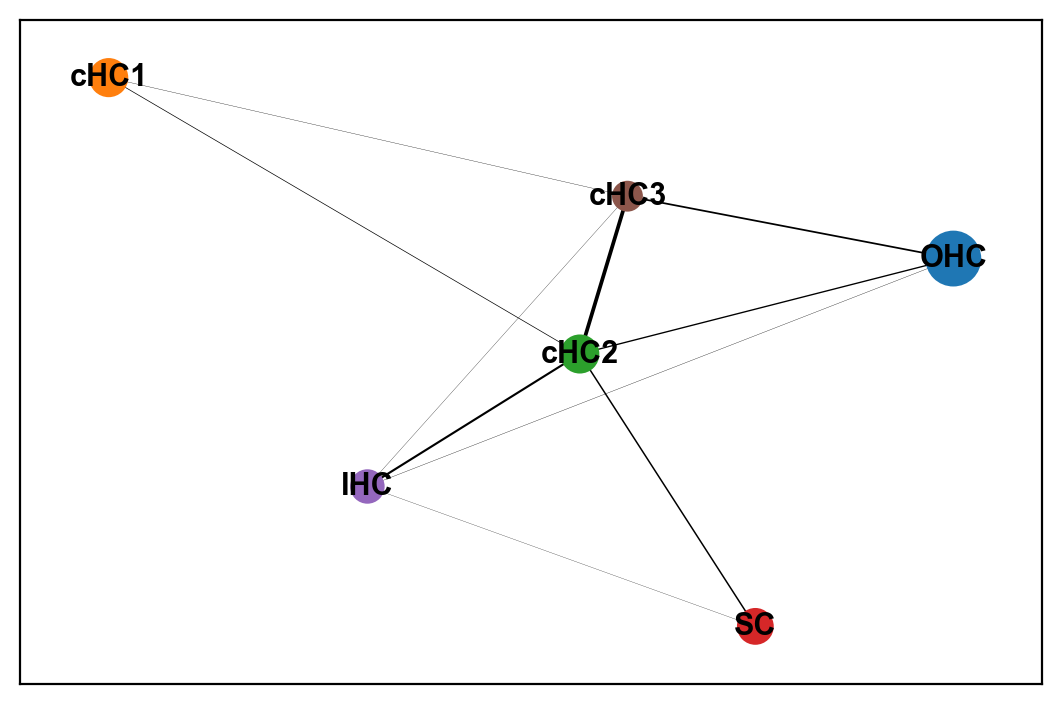

In [18]:
#PAGA
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, color=['leiden', 'Prss23', 'Fgfr3', 'Atoh1', 'HA', 'Slc26a5', 'Slc17a8'])
sc.pl.paga(adata, color=['leiden'])

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


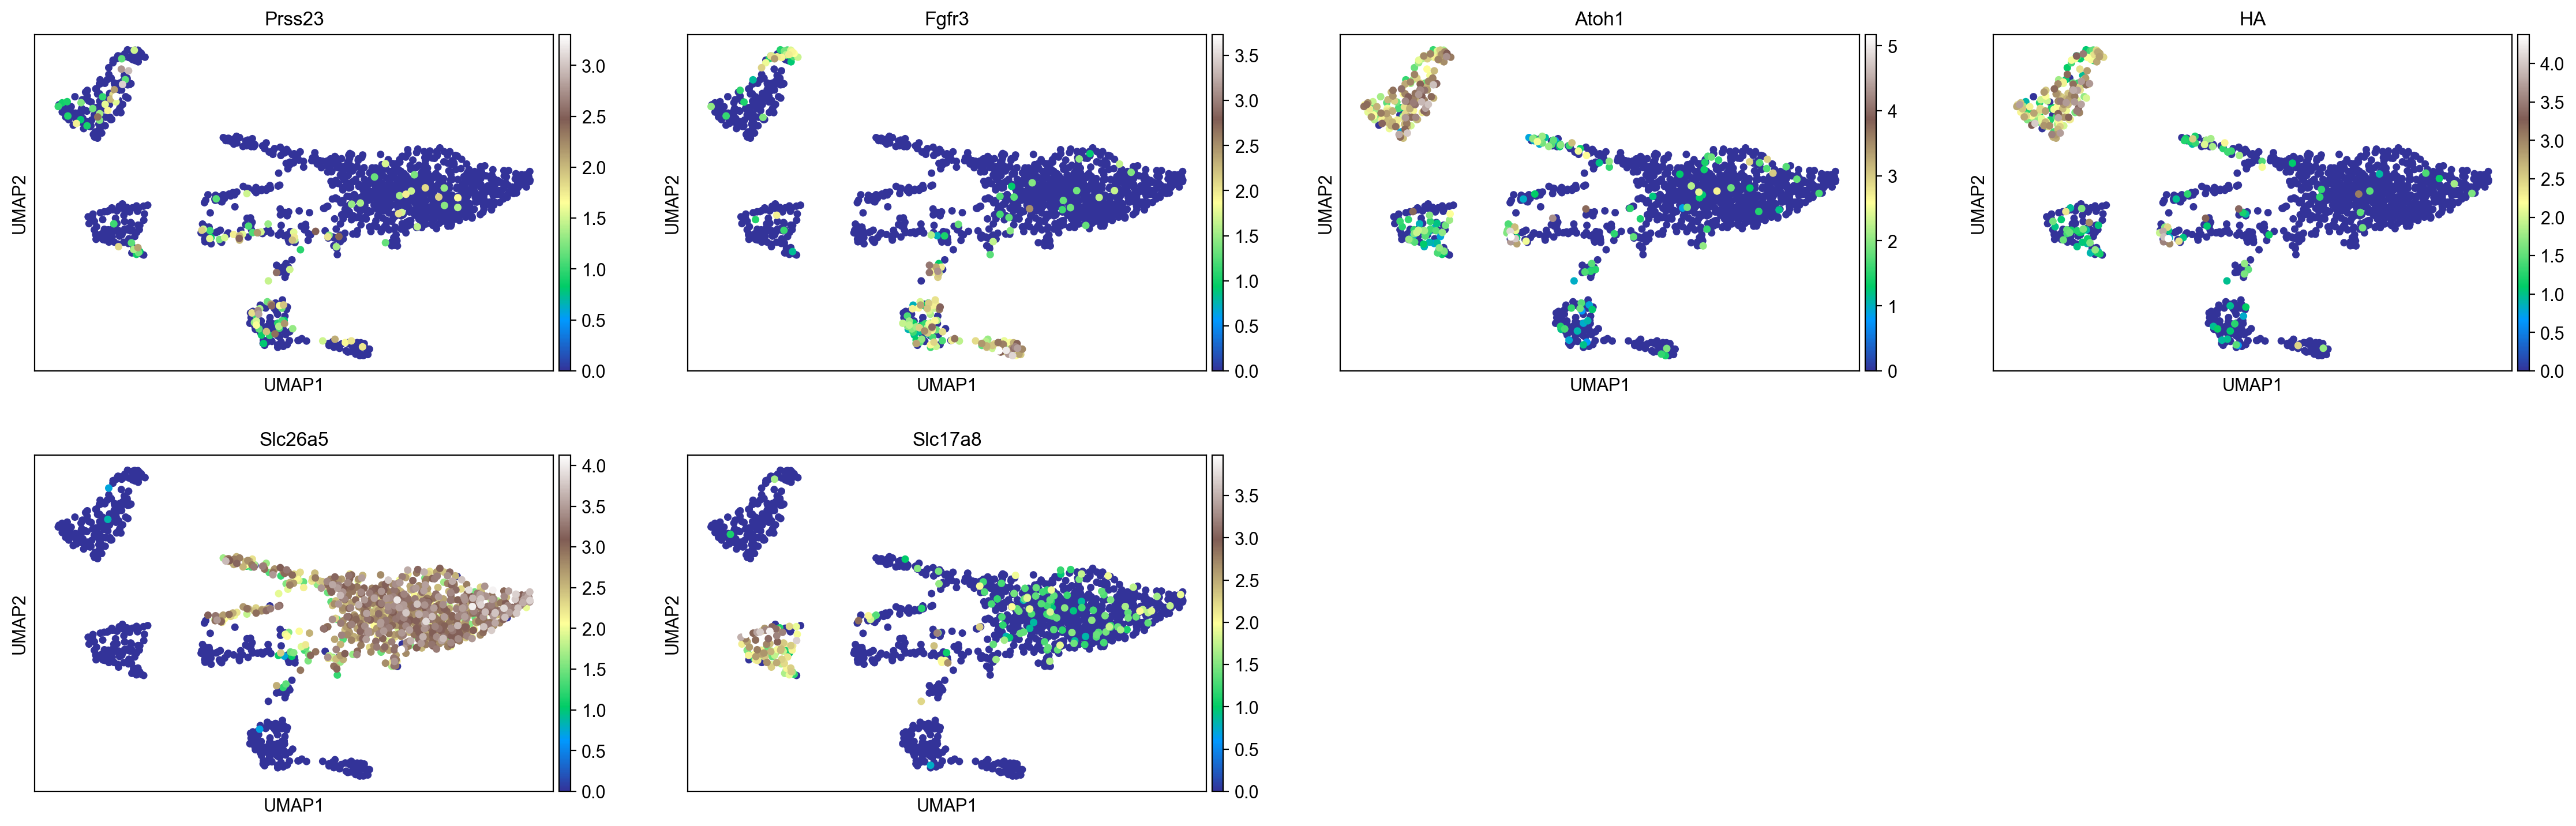

C:\Users\rvi33352\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


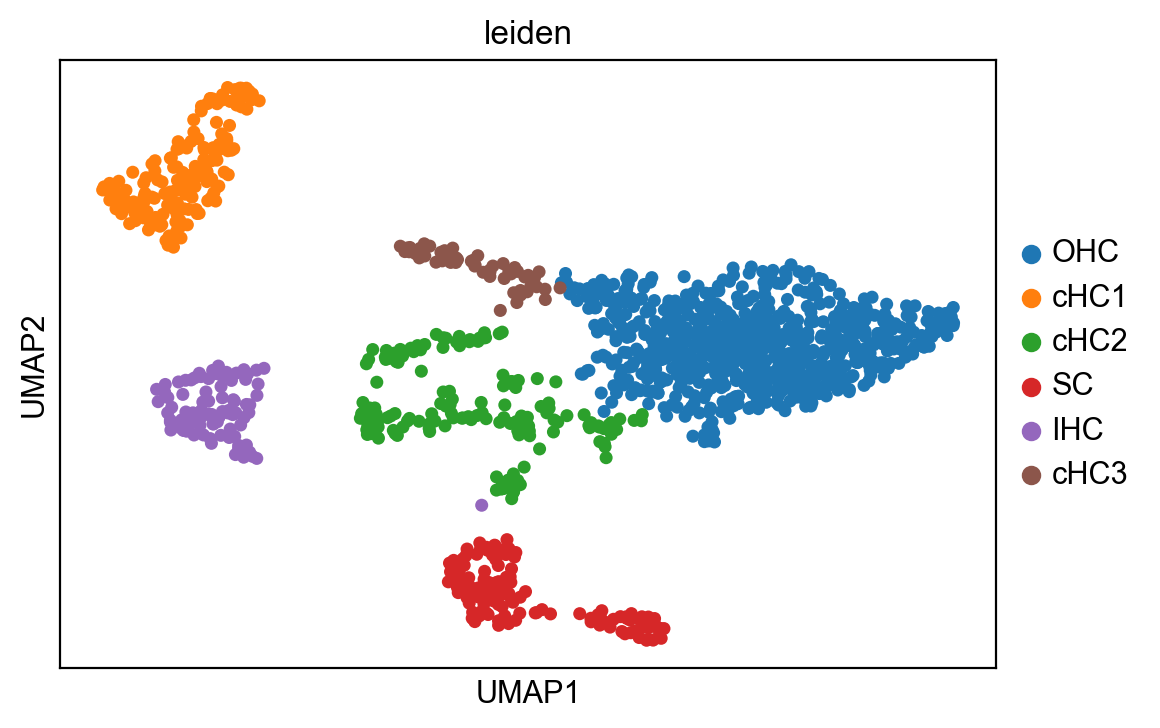

In [19]:
sc.tl.umap(adata, init_pos='paga')
sc.pl.umap(adata, color=['Prss23', 'Fgfr3', 'Atoh1', 'HA', 'Slc26a5', 'Slc17a8'], cmap='terrain')
sc.pl.umap(adata, color=['leiden'])

--> added 'pos', the PAGA positions (adata.uns['paga'])


C:\Users\rvi33352\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


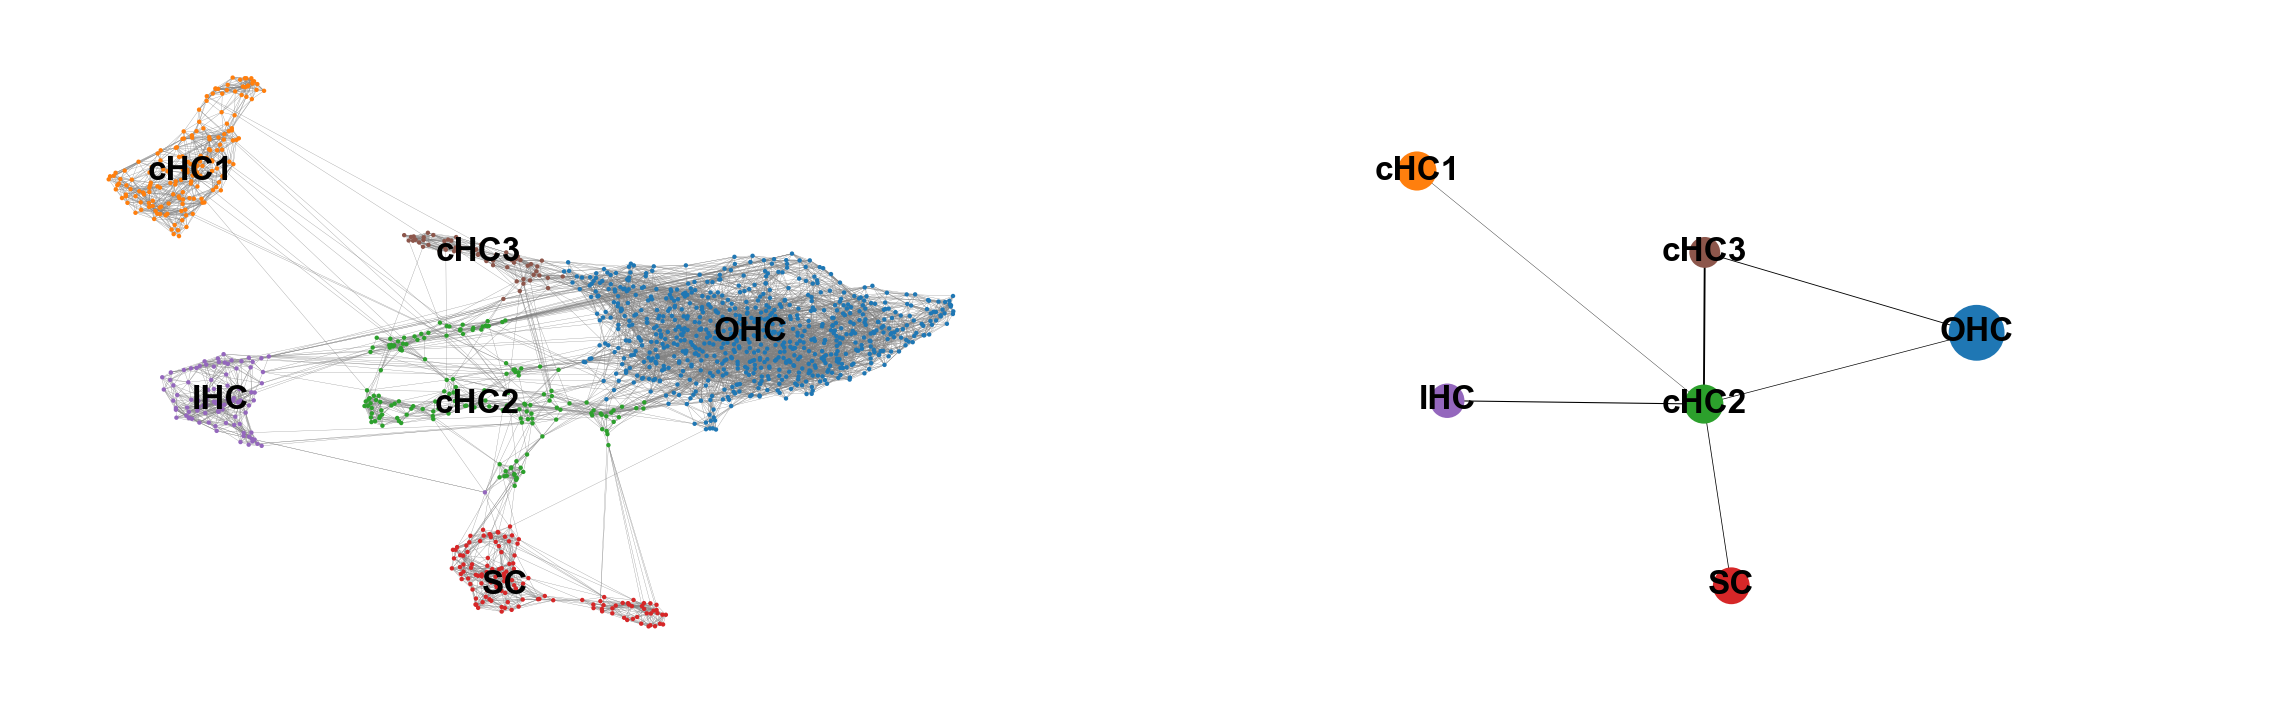

In [20]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save=True)

In [21]:
adata.obs["leiden"].value_counts()

leiden
OHC     751
cHC1    165
cHC2    164
SC      127
IHC      95
cHC3     59
Name: count, dtype: int64

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


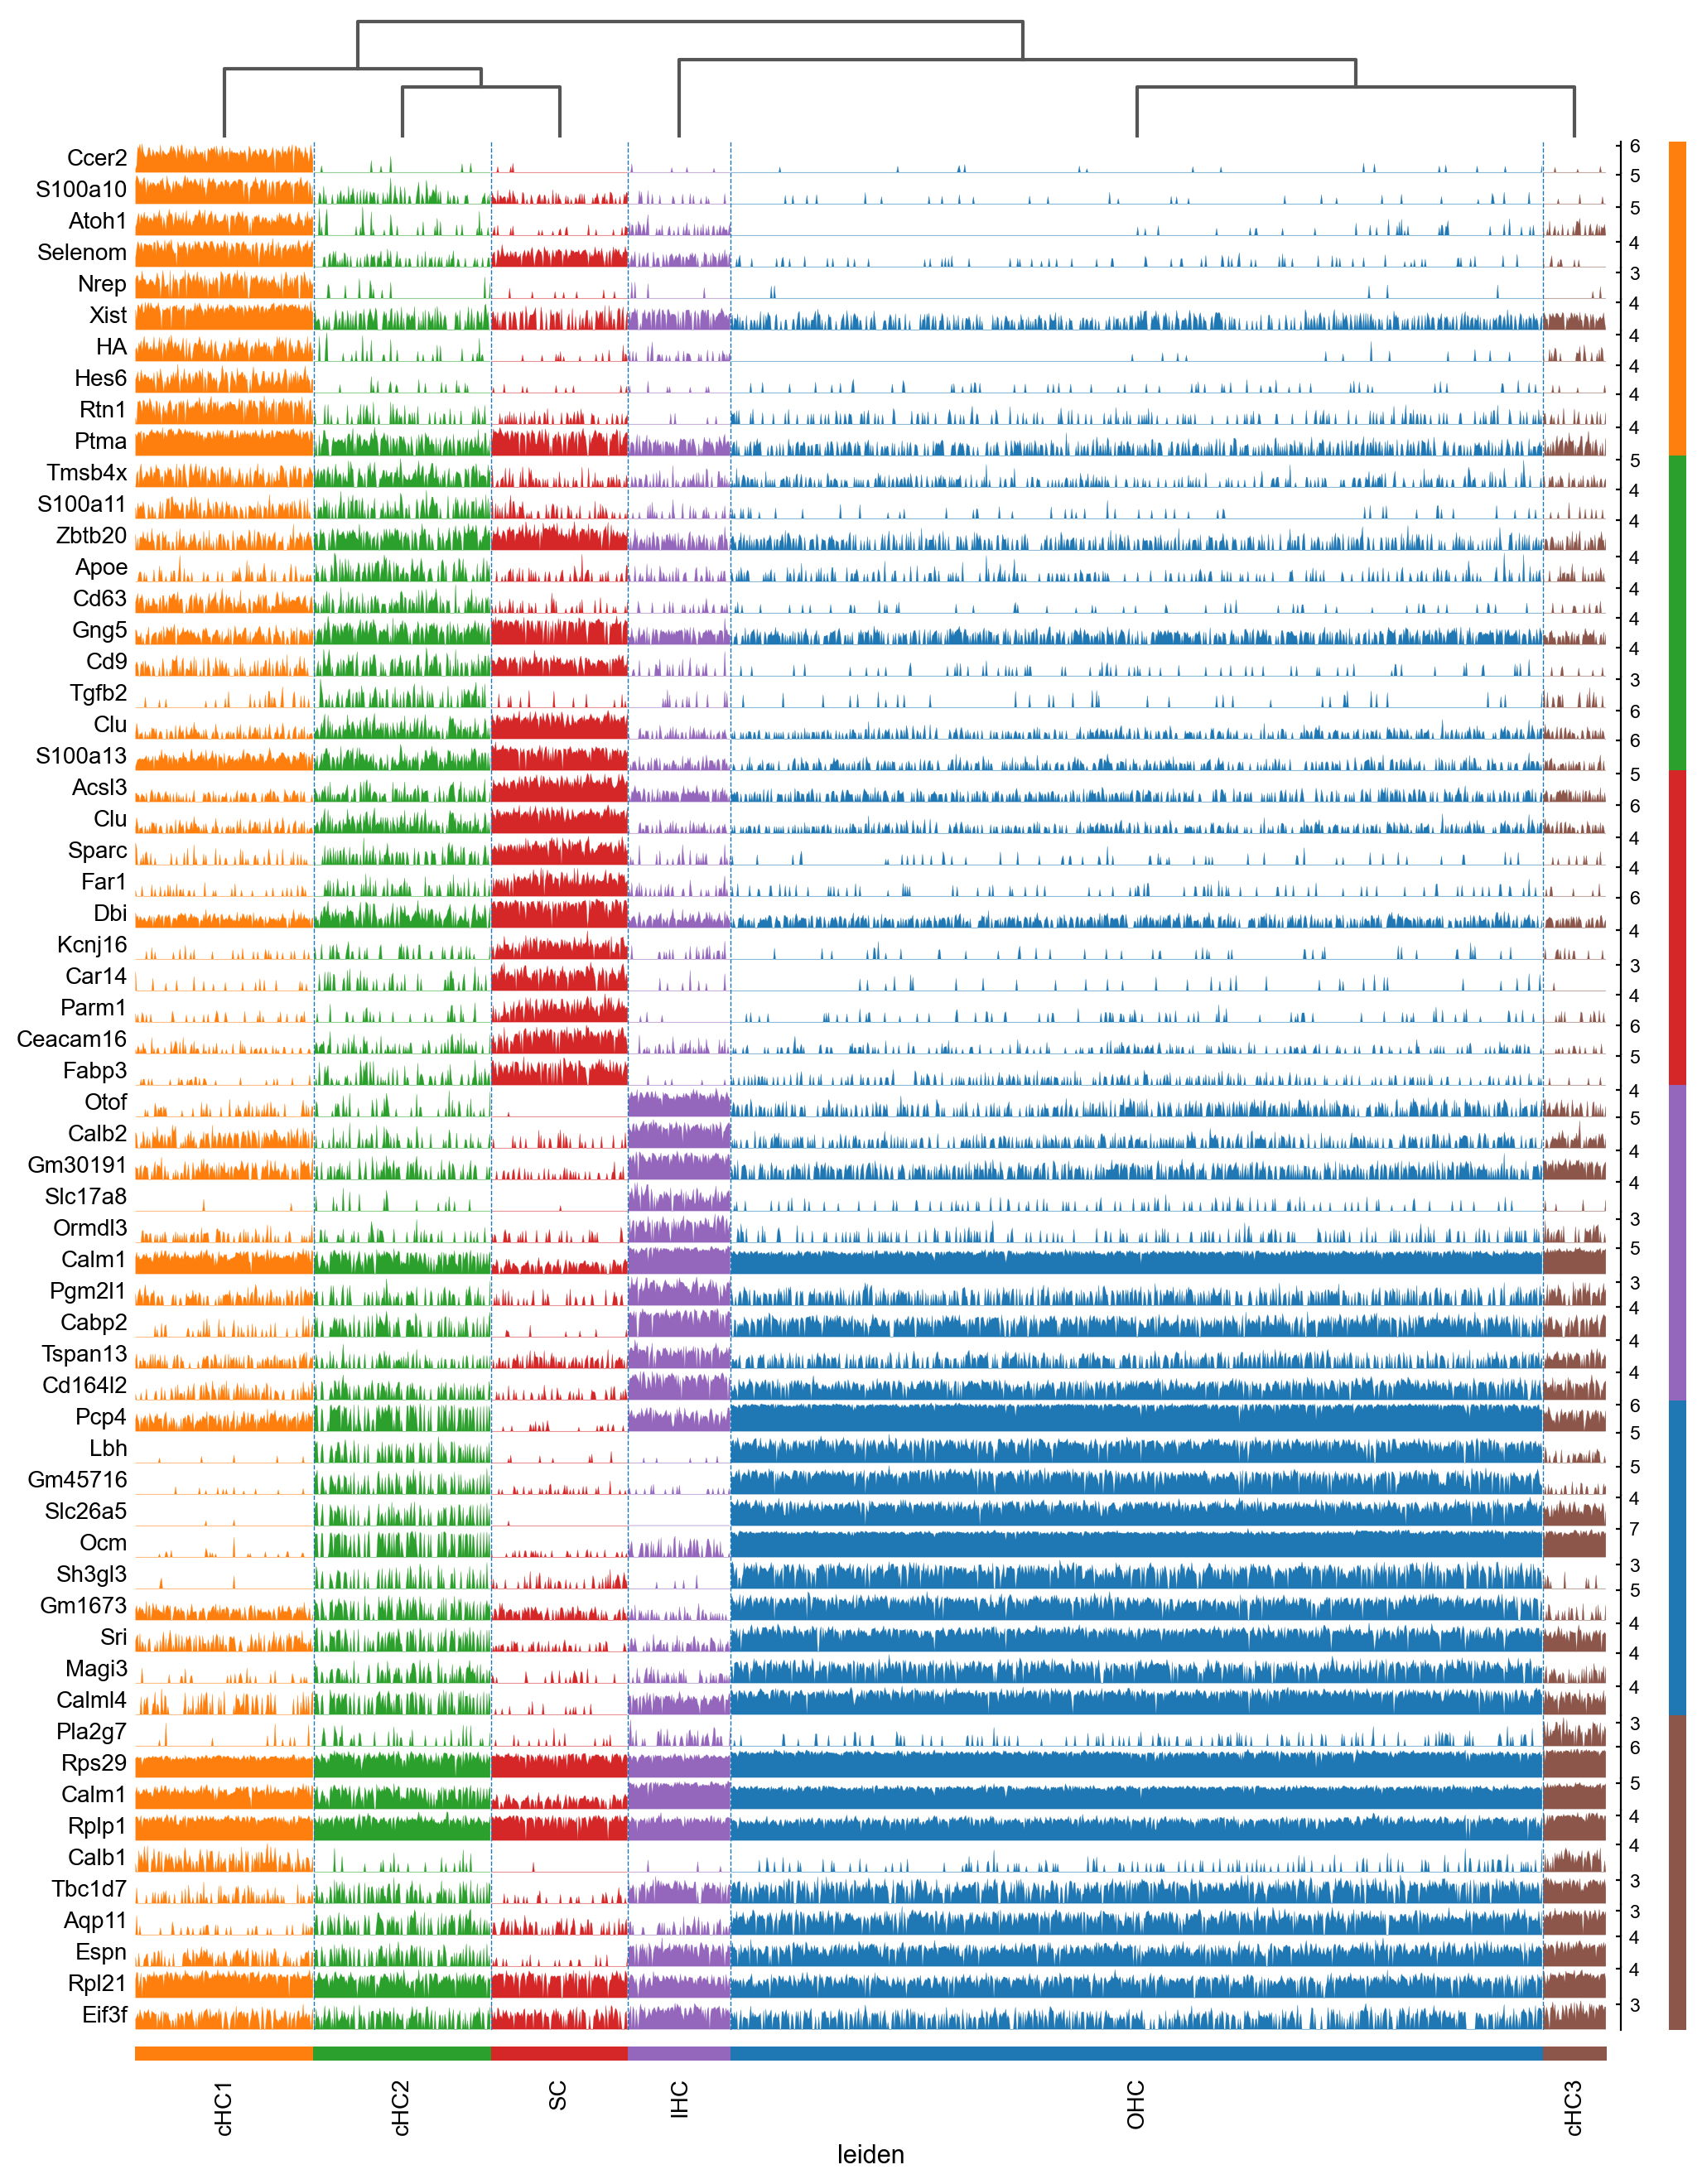

In [22]:
#Top 5 DEGS
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')
sc.pl.rank_genes_groups_tracksplot(adata, n_genes=10, groupby = 'leiden', 
                                    values_to_plot='logfoldchanges', rotation = 90)

In [23]:
Top100 = ["S100a13","Lgals1","Epyc","Dbi","Tmsb4x","Ceacam16","Nme2","Itih5","Cd9","S100a1","Apoe","Gjb2","Trpm3","Epcam",
          "Cryab","Tmod1","S100a11","Prss36","Sparc","Cst3","Anxa2","Zbtb20","Syne2","Mir100hg","Far1","Btg1","Cyb5a","Gjb6",
          "Kcnj16","Wls","Cdkn1b","Gng5","Slc1a3","Rflnb","Clu","Atox1","Nupr1","Tmsb10","Ptms","Enho","Grb14","Fibin","Mal",
          "Cnmd","Skp1a","Tspo","Id1","Npc2","Fam107a","Scd1","Stmn1","Lum","Tdrd12","S100a6","Cd63","Id3","Rnd2","Ppdpf","Tspan8",
          "Mia","Sms","Acsl3","Mpzl2","Car14","Cd81","Gsta4","Tgfb2","Bzw1","Anxa5","Cobl","Nr2f1","S100a10","Bdh2","Ces1d","Socs2",
          "Jun","Selenom","Nudt4","Atp1b1","Phyhipl","Wfdc2","Hes1","Slitrk6","Mgst1","Marcksl1","Rpl11","Rps26","Ptma","Tm4sf1",
          "Odc1","Gsn","Hmgn1","Gas2","Ier2","Sdc4","Prdx6","Plod2","Fxyd6","Rps12","Hs3st1","Ocm","Pcp4","Gm45716","Cib2","Lbh",
          "Slc26a5","Acbd7","Lhfpl5","Calm1","Calml4","Espn","Lmo7","Rbm24","Calb2","Cd164l2","Cabp2","Chst2","Sh3gl3","Tbc1d7",
          "Dnm3","Usp46","Pou4f3","Pvalb","Limd2","Homer2","Dytn","Osbp2","Strip2","C1ql1","Myo6","Abca5","Magi3","Lrrc10b",
          "Sri","Cacna1d","Ap3b2","Hsd17b7","Mmd","Otof","Ppp1r27","Pkig","AI593442","Lpin2","Chrna10","Gm1673","Apba1","Tmc1","Mkrn2os",
          "Dst","Olfm1","Dner","Strc","2210011C24Rik","Slk","Kncn","Grxcr2","Smpx","Ttc7","Stard10","Hist3h2ba","Elmod1","Myo15","Nf2",
          "Camk2b","AA465934","Efcab14","Srd5a1","Calm2","Hsp90aa1","Snap91","Ociad2","Atp2b2","Aftph","Kcp","Lrtm2","Akap9","Efr3a",
          "Loxhd1","Paqr9","Nhlrc2","Cgn","Cdk5rap2","Tmie","Sorbs2","Trim45","Syne4","Selenow","Triobp","Nbeal1","Fscn2","Gpam","Kcna10",
          "Akr1b3","Mpdz","Kif13a","Rab3ip","Chrna9","Defb25","Cdk14","Gm30191"]

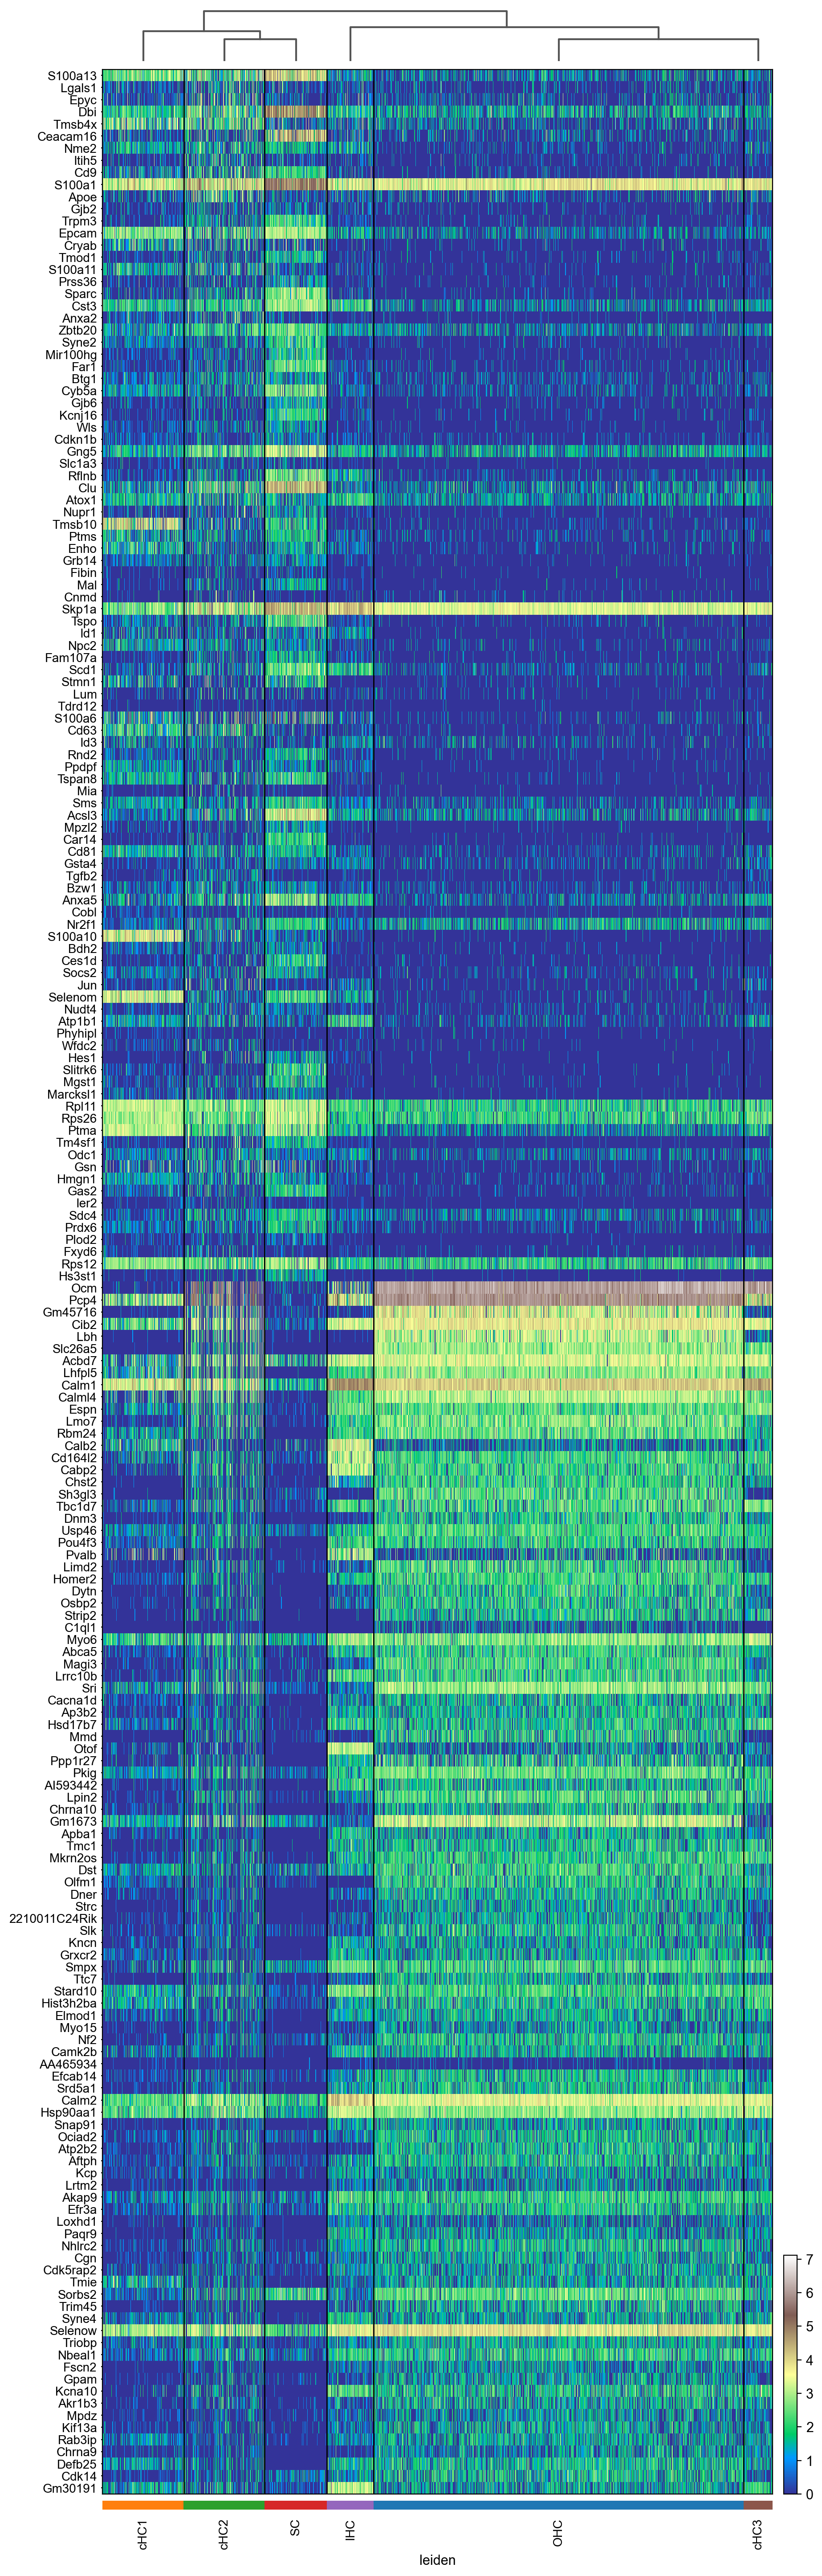

In [24]:
sc.pl.heatmap(adata, Top100, groupby='leiden', show_gene_labels=True, cmap='terrain', dendrogram=True, swap_axes=True)

In [25]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden'] == 'SC')[0]
sc.tl.dpt(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9964388  0.99444443 0.9889749  0.9824813  0.97920555
     0.97718334 0.97151864 0.95578873 0.947574   0.9411473  0.9246927
     0.9168439  0.9107269  0.90344054]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


C:\Users\rvi33352\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


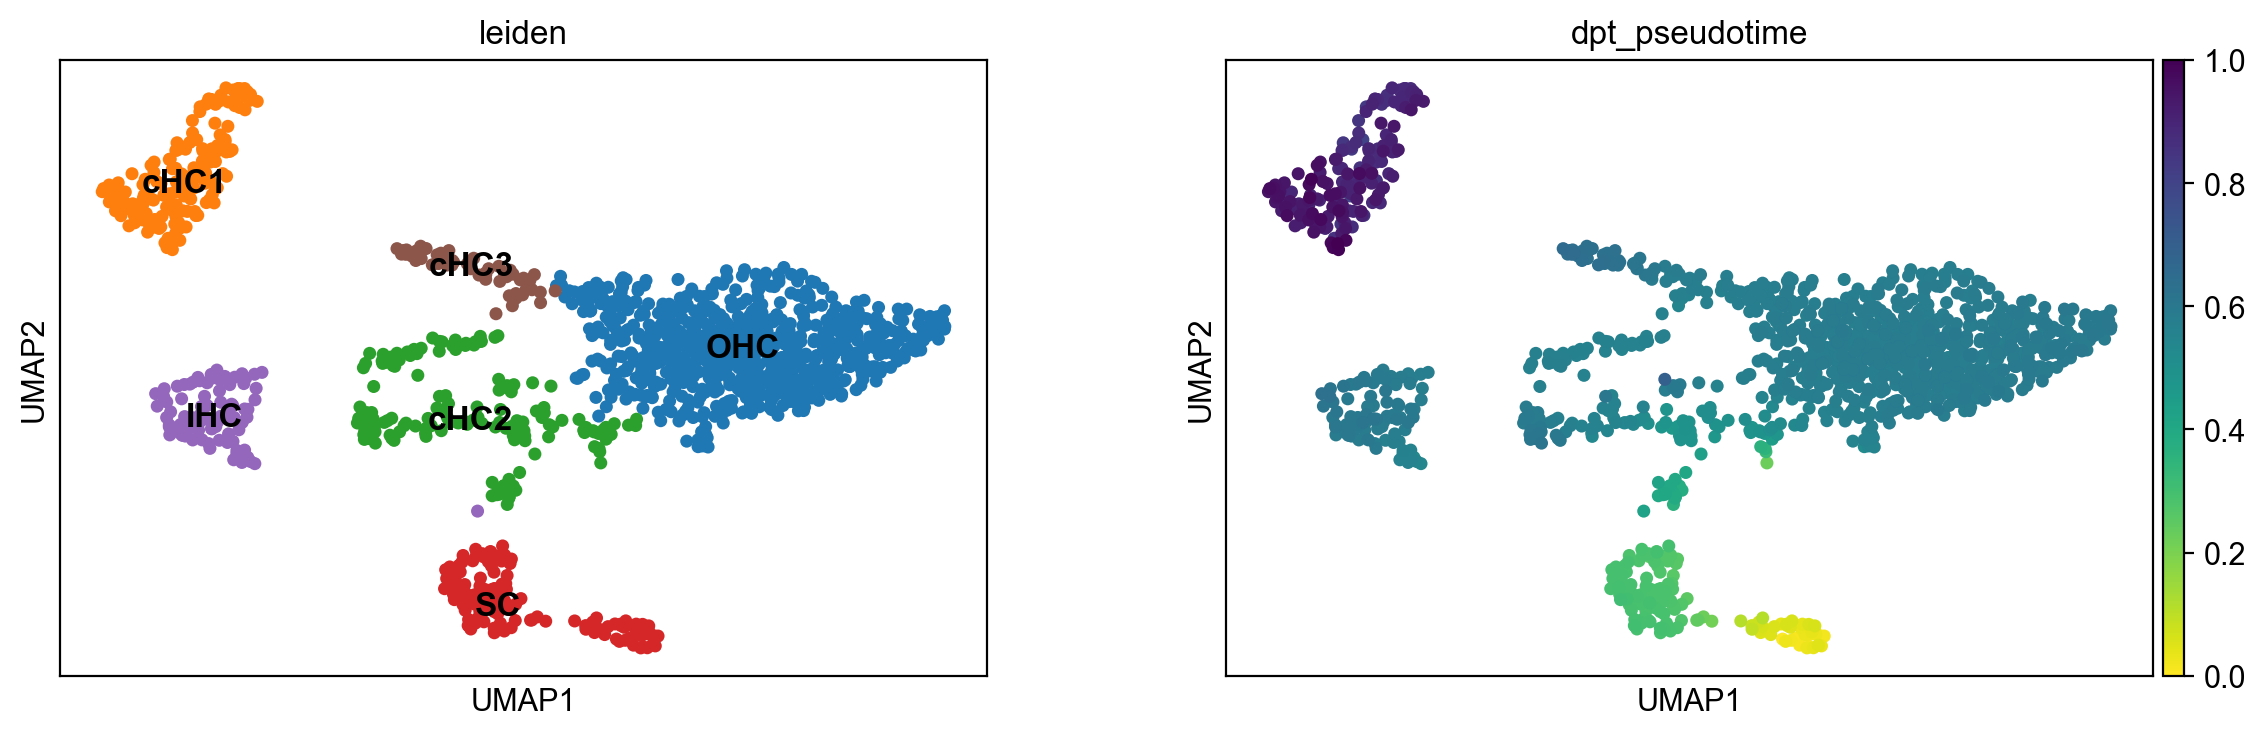

--> added 'pos', the PAGA positions (adata.uns['paga'])


C:\Users\rvi33352\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\paga.py:912: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(


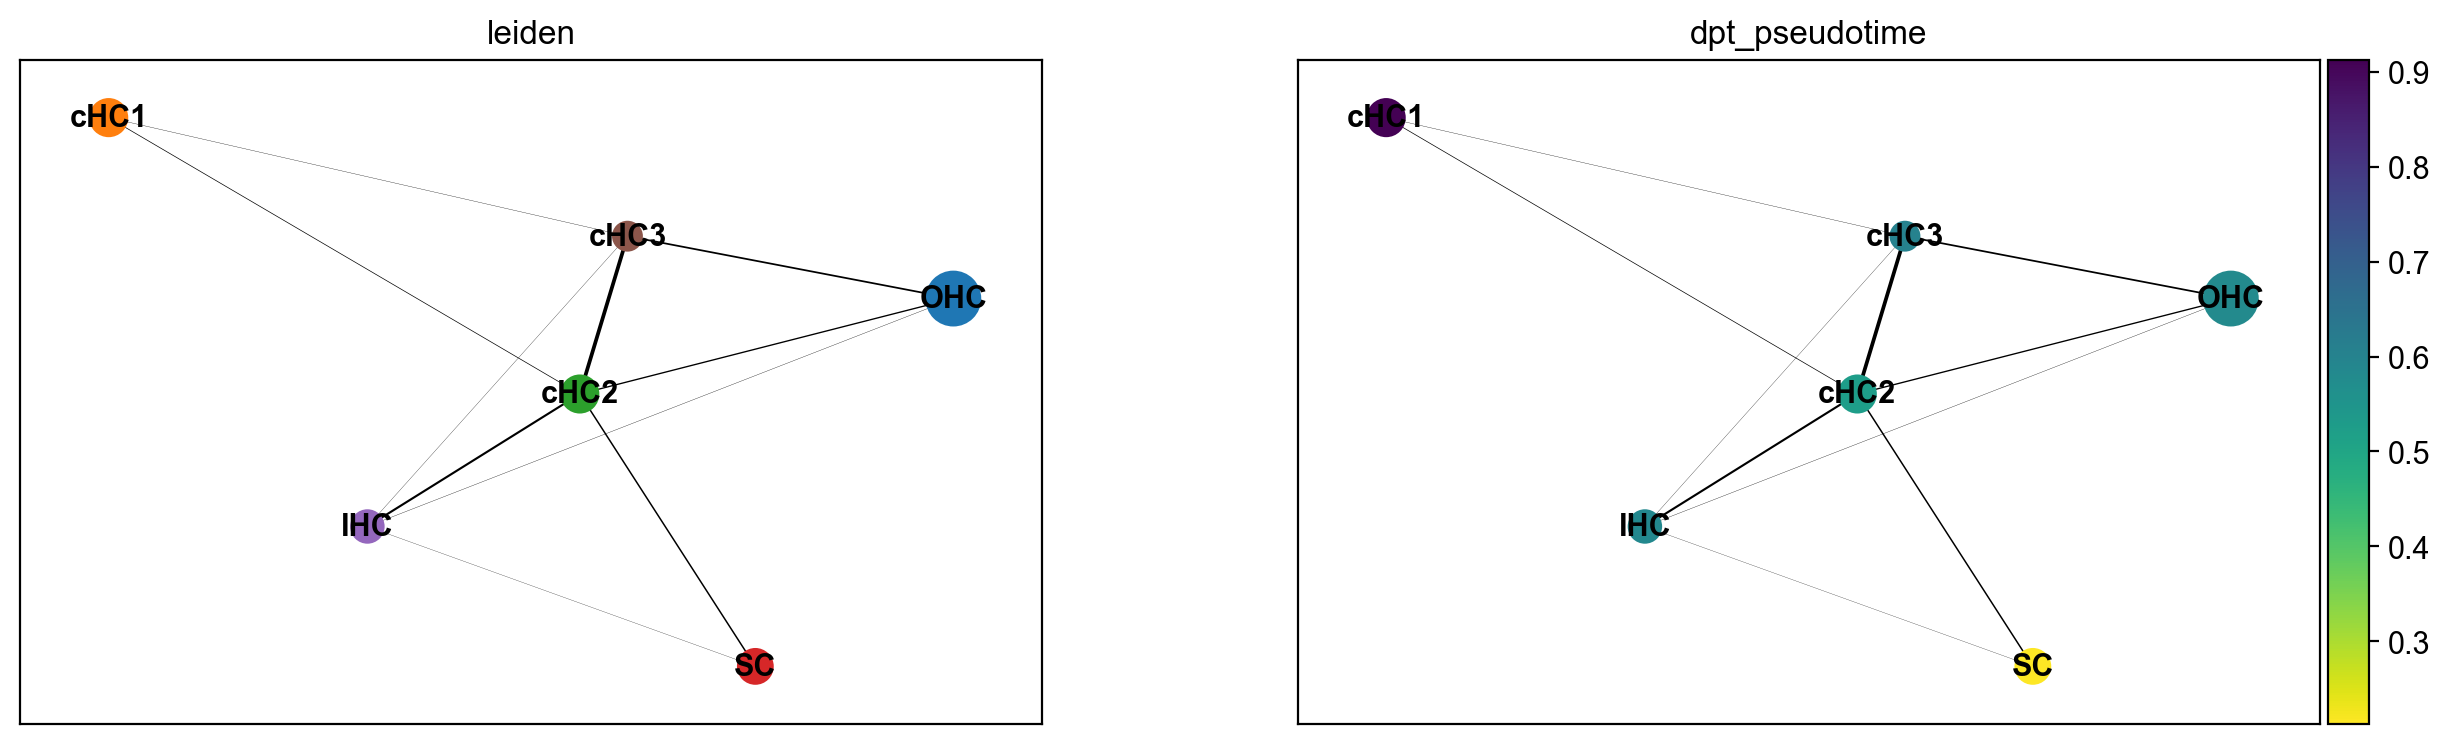

In [27]:
sc.pl.umap(adata, color=['leiden', 'dpt_pseudotime'], legend_loc='on data', cmap='viridis_r')
sc.pl.paga(adata, color=['leiden', 'dpt_pseudotime'], cmap='viridis_r')